In [3]:
# Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ 
# more than those who prefer to watch them alone?

# 1. Load the data 
# 1a. Extract movie ratings for 'The Wolf of Wall Street (2013)' and "Social viewing preference" column (477)
    # “movies are best enjoyed alone” (1 = y, 0 = n, -1 = nr)

# 2. Data Cleaning
# 2a. Remove all NaN values, row-wise
# 2b. Remove where social viewing preference = -1, row-wise
# 2c. Split the data into two groups: 1. alone (1), 2. together (0)
# 2c. Get the median for both groups (descriptive statistics)

# 3. Mann-Whitney U test

# 4. Plotting the data

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
# 1. Load the data 
df = pd.read_csv('movieReplicationSet.csv', sep=',')

# 1a. Finding the index # for movie 'The Wolf of Wall Street (2013)' 
indexWolf = df.columns.get_loc('The Wolf of Wall Street (2013)')

# 1b. Extract movie ratings for 'The Wolf of Wall Street (2013)' and "Social viewing preference" column (477)
data = df.iloc[:,[indexWolf,476]]
data

,The Wolf of Wall Street (2013),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,1
1,NaN,0
2,NaN,0
3,4.0,1
4,3.0,1
...,...,...
1092,NaN,0
1093,3.5,0
1094,2.0,0
1095,NaN,1


In [3]:
# 2. Data Cleaning
# 2a. Remove all NaN values, row-wise
data_ = data.dropna()

# 2b. Split the data into two groups: 1. alone (1), 2. together (0)
# “movies are best enjoyed alone” (1 = y, 0 = n, -1 = nr) 
alone = data_[data_.iloc[:,1] == 1] 
together = data_[data_.iloc[:,1] == 0] 

# 2c. Get the median for both groups (descriptive statistics)
alone_med = np.median(alone.iloc[:,0])
together_med = np.median(together.iloc[:,0])

alone_med, together_med

(3.5, 3.0)

In [4]:
alone.shape

(393, 2)

In [5]:
together.shape

(270, 2)

In [28]:
# 3. Mann-Whitney U test
u,p = stats.mannwhitneyu(alone.iloc[:,0], together.iloc[:,0])
u,p

(56806.5, 0.1127642933222891)

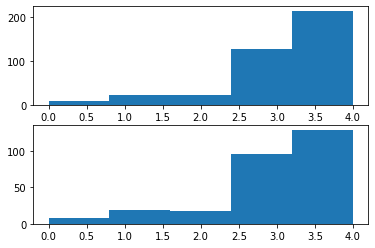

In [29]:
plt.subplot(2,1,1)
plt.hist(alone.iloc[:,0], bins=5)
plt.subplot(2,1,2)
plt.hist(together.iloc[:,0], bins=5)
plt.show()